<a href="https://colab.research.google.com/github/BYFarag/Education_Inequality/blob/main/Bayan_Farag_Analysis_DATA_3320_Education.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

##### $\rightarrow$ The objective of this project is to address the issue of inequality in educational opportunities among U.S. high schools. Our main focus is on the average performance of students on standardized tests such as the ACT or SAT, which are integral to the college application process. Through our research, we seek to determine whether socioeconomic factors influence school performance on these exams.



## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

from sklearn.linear_model import LinearRegression

from mpl_toolkits.mplot3d import Axes3D

import statsmodels.formula.api as smf
from mpl_toolkits import mplot3d
from matplotlib import cm

from sklearn import linear_model, tree
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

import plotly.offline as pyo
import plotly.graph_objs as go

from itertools import combinations
from math import comb

from os import name

## Load clean data

##### $\rightarrow$ Loading the clean data set from Github. 

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/BYFarag/Education_Inequality/main/clean_train%20(3).csv')

In [45]:
df_test = pd.read_csv('https://raw.githubusercontent.com/BYFarag/Education_Inequality/main/clean_test%20(1).csv')

##### $\rightarrow$ Reviewing the contents of the data set.

Reviewing the contents of the train data set with our added household inputs

In [4]:
df_train.head()

four_people  median_income  one_person  percent_college  percent_lunch  \
0  1962.794089        41793.0  2554.41932         0.602419       0.542056   
1   474.000000        38173.0   699.00000         0.469225       0.339655   
2   422.000000        39635.0  1021.00000         0.567361       0.270175   
3   286.000000        40978.0   276.00000         0.467614       0.315556   
4   863.000000        36875.0  1247.00000         0.604470       0.548410   

   percent_married  rate_unemployment state  three_people   two_people  \
0         0.574034           0.111111    NJ   1400.381764  2852.091229   
1         0.711429           0.135246    IN    417.000000   866.000000   
2         0.694514           0.083419    PA    441.000000   991.000000   
3         0.766901           0.062531    MO    178.000000   467.000000   
4         0.803435           0.071429    FL    704.000000  2055.000000   

        year  zip_code  average_act  
0  2016-2017      7306    16.538462  
1  2016-2017     47567    20.367521  
2  2016-2017     15853    20.347985  
3  2016-2017     64644    21.600000  
4  2016-2017     34669    21.056166

## State your questions

The overall problem is to determine whether and how average school ACT performance is related to socioeconomic factors. To answer this general problem, you will need to ask specific questions about the data.


#### $\rightarrow$ Here we are going to break our problem into smaller problems

- is median income a significant predictor of ACT scores?
- is household size negatively or positively skewed? 
- Does percent college of the zip code effect students?

# Analysis

## Pairplot for all Variables

Here we are generating a pair plot using the seaborn library. Before creating the plot we are dropping the column named 'zip_code'

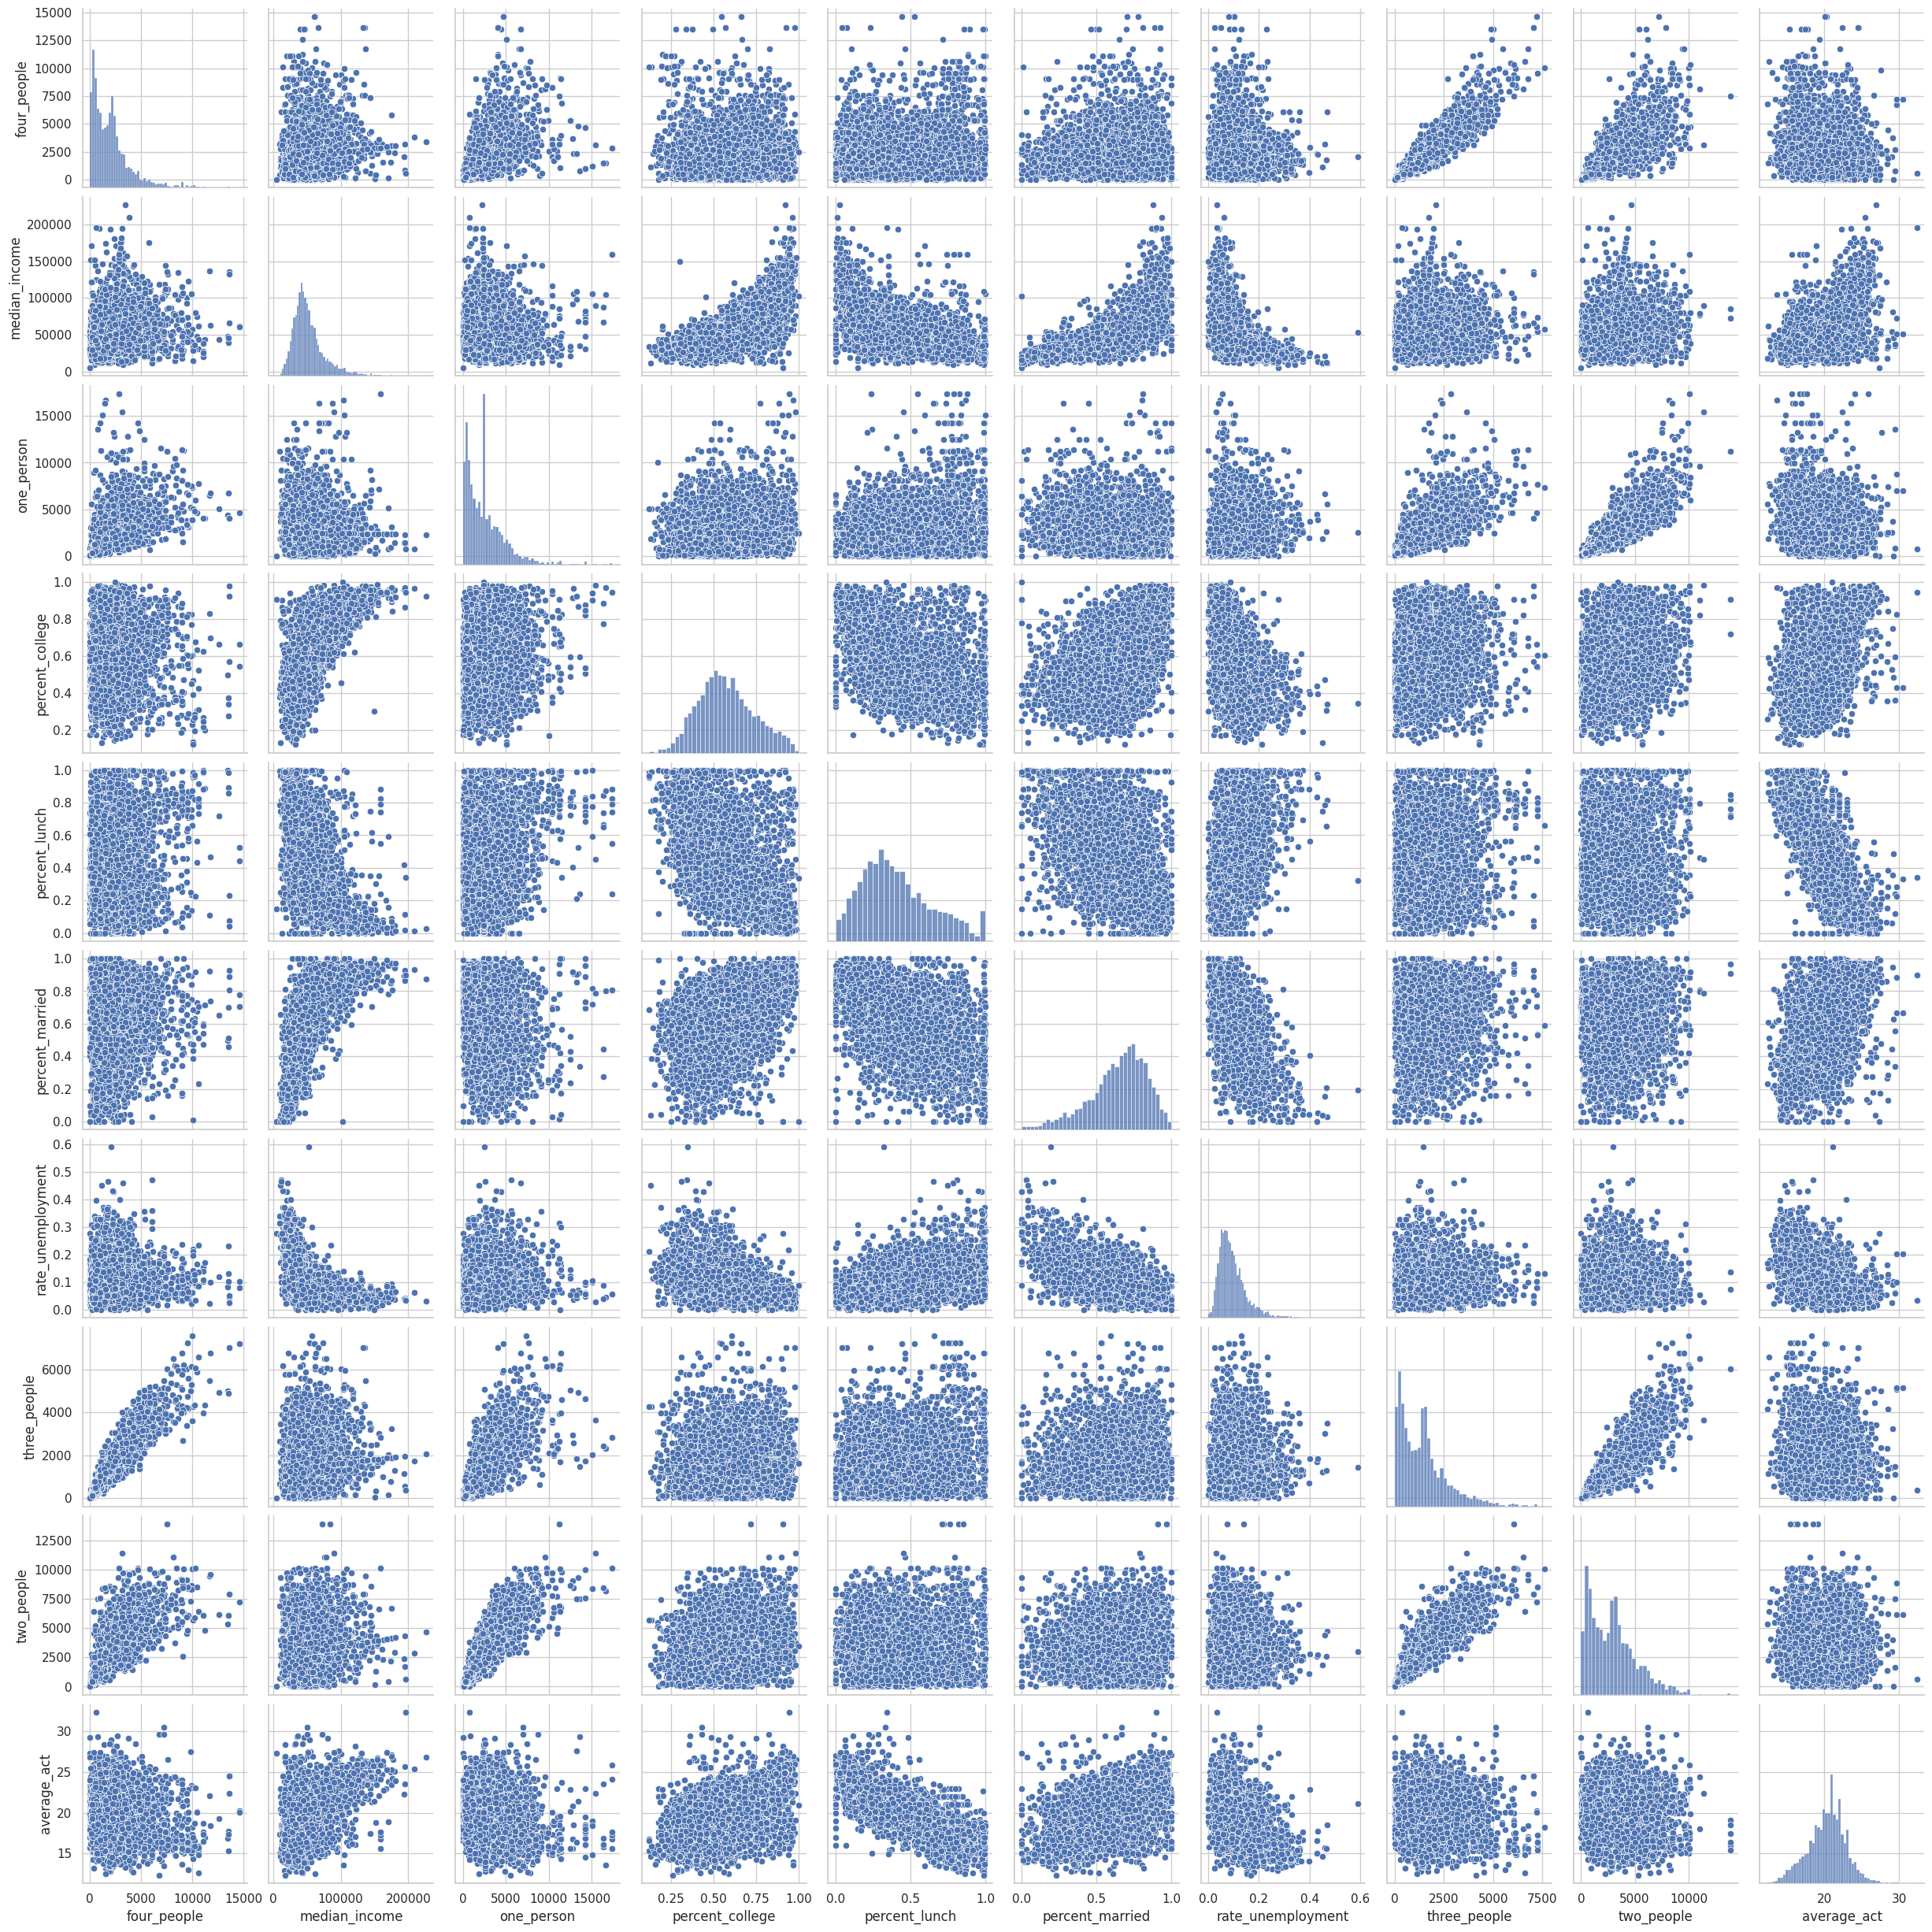

In [5]:
sns.pairplot(df_train.drop(columns = ['zip_code']))

We are going to do a deeper dive into the dataset and see where the data is coming from

In [54]:
layout = dict(geo={'scope': 'usa'})

data = dict(type='choropleth',
            locations=df_train['state'].unique(),
            locationmode='USA-states',
            z=np.ones(len(df_train['state'].unique())),
            text=df_train['state'].unique())

x = go.Figure(data=[data], layout=layout)

pyo.iplot(x)

With this model we can see that not all states are being used

## Correlation Matrix

Here we are creating a correlation matrix to see the correlation between variables. If the correlation is -1 or 1 then there is a perfect correlation. One means postive correlation - as one variable increases, the other variable also increase in linear fashion. However if its negative then one increase the other decreases. Its import to note that although two variables may be highly correlated it does not mean that one variable causes the other to change. Correlation does not imply causation. 

<ipython-input-6-f3c42557993f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



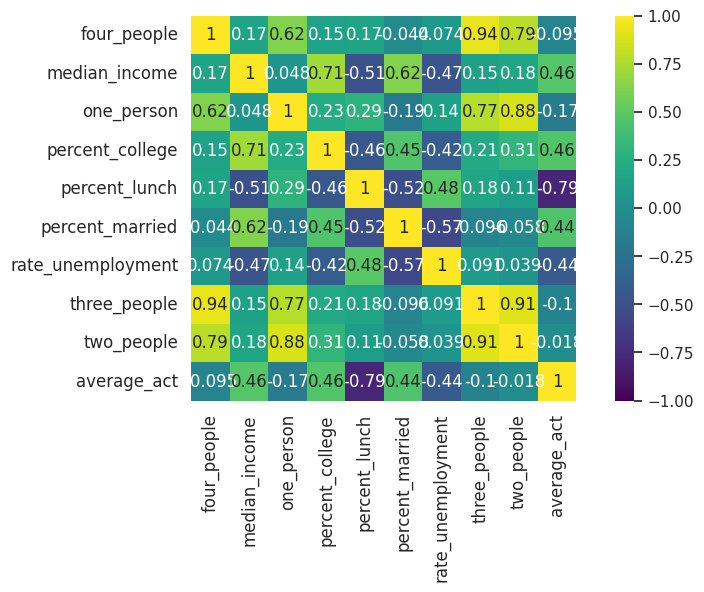

In [6]:
corr_matrix = df_train.drop(columns = ['zip_code']).corr() 

plt.figure(figsize=(10,5))

sns.heatmap(corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap='viridis')

plt.tick_params(labelsize=12);

After creating this we can see a couple of trends 
1. Percent lunch and average ACT have a negative correlation 
2. Percent college & percent married have a postive correlation 
3. Our added subset of average house hold doesnt have a huge impact however this does tell us that maybe it doesnt effect it as much as we thought. 

## Model Fits

In this section we will be fitting a linear regression model using the Ordinary Least Squares

### create a model fit for all predictors

For the code below we are making the independent variables -  median_income, rate_unemployment, percent_lunch, percent_married, percent_college, one_person, two_people, three_people, four_people - predict the dependent variable 'average_act' 

In [7]:
model = smf.ols(formula='average_act ~ median_income + rate_unemployment + percent_lunch + percent_married + percent_college + one_person + two_people + three_people + four_people ', data = df_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     1115.
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        23:03:51   Log-Likelihood:                -10633.
No. Observations:                5781   AIC:                         2.129e+04
Df Residuals:                    5771   BIC:                         2.135e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.7515      0.15

the p-values for `percent_married` , `median_income`, 'four_people', 'one_person' are not relevant or important in this context, with all the variables together. When all 5 variables are together, just `rate_unemployment`, `percent_lunch`, and `percent_college` are really relevant.

## Best Predictor

Here we are going to compare each model with other models with the same number of variables to get the best subset selection 

In [31]:
X = df_train[df_train.columns.difference(['id', 'average_act', 'year', 'school_type', 'school_level', 'state', 'zip_code', 'one_person', 'two_people', 'three_people' 'four_people'])]

Y = df_train['average_act']

In [32]:
variable_names = X.columns.values

variable_names

array(['four_people', 'median_income', 'percent_college', 'percent_lunch',
       'percent_married', 'rate_unemployment', 'three_people'],
      dtype=object)

In [30]:
r2_list = []
name_list = []
aic_list = []
bic_list = []

for x in range (1, 8):
  subset = combinations(variable_names, x)
  best_name = ''
  best_r2 = 0
  best_aic = 9999999999
  best_bic = 9999999999
  for n, names in enumerate(subset):
    names
    predictors = X.loc[:,names]
    predictors.head()
    model_2 = sm.OLS(Y, sm.add_constant(predictors)).fit()
    model_2.rsquared_adj
    if (model_2.rsquared_adj > best_r2):
      best_name = names
      best_r2 = model_2.rsquared_adj
      best_aic = model_2.aic
      best_bic = model_2.bic
    name_list.append(best_name)
    r2_list.append(best_r2)
    aic_list.append(best_aic)
    bic_list.append(best_bic)

name_list


[('four_people',),
 ('median_income',),
 ('median_income',),
 ('percent_lunch',),
 ('percent_lunch',),
 ('percent_lunch',),
 ('percent_lunch',),
 ('four_people', 'median_income'),
 ('four_people', 'median_income'),
 ('four_people', 'percent_lunch'),
 ('four_people', 'percent_lunch'),
 ('four_people', 'percent_lunch'),
 ('four_people', 'percent_lunch'),
 ('four_people', 'percent_lunch'),
 ('median_income', 'percent_lunch'),
 ('median_income', 'percent_lunch'),
 ('median_income', 'percent_lunch'),
 ('median_income', 'percent_lunch'),
 ('percent_college', 'percent_lunch'),
 ('percent_college', 'percent_lunch'),
 ('percent_college', 'percent_lunch'),
 ('percent_college', 'percent_lunch'),
 ('percent_college', 'percent_lunch'),
 ('percent_college', 'percent_lunch'),
 ('percent_college', 'percent_lunch'),
 ('percent_college', 'percent_lunch'),
 ('percent_college', 'percent_lunch'),
 ('percent_college', 'percent_lunch'),
 ('four_people', 'median_income', 'percent_college'),
 ('four_people', '

Standardize and use the coefficient with the largest magnitude to determine best predictor

In [33]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_std, Y)

coef_abs = np.abs(model.coef_)
best_predictor = X.columns[np.argmax(coef_abs)]
print('The best predictor is:', best_predictor)

The best predictor is: percent_lunch


The best predictor is percent_lunch

## Best Subset Selection

We will now go through to find the AIC, BIC and adjusted R-squared. X his going to be the predictor values and Y is going to be the Target values. 

 Returns

    best_aic : AIC for the best model at each number of possible predictors

    best_bic : BIC for the best model at each number of possible predictors

    best_adjusted_rsquared : adjusted R-squared for the best model at each number of possible predictors

    best_predictors : predictor names for the best model at each number of possible predictors
  

In [34]:
def best_subset_selection(X, Y):
   
    variable_names = X.columns.values

    number_variables = len(variable_names)

    # Initialize empty arrays to hold the AIC, BIC, and adjusted r-squared for the best model 
    # at each number of predictors
    best_aic = np.zeros(number_variables)
    best_bic = np.zeros(number_variables)
    best_adjusted_rsquared = np.zeros(number_variables)

    # Initialize empty list to hold the names of the best predictors at each number of predictors
    best_predictors = list()

    # Loop over possible numbers of predictors
    for k in range(number_variables):

        # Get the names of all combinations of k+1 predictors
        subset_names = list(combinations(variable_names, k+1))

        # Loop over all models with k+1 predictors
        for n, predictor_names in enumerate(subset_names):

            # Fit the model
            predictors_subset = X.loc[:, predictor_names]

            model = sm.OLS(Y, sm.add_constant(predictors_subset)).fit() 

            # Initialize the best values with the first model
            if n == 0:

                best_rsquared_k = model.rsquared
                best_aic_k = model.aic
                best_bic_k = model.bic
                best_adjusted_rsquared_k = model.rsquared_adj
                best_predictors_k = predictor_names

            # If a model has a better r-squared, update the best values
            elif model.rsquared > best_rsquared_k:

                best_rsquared_k = model.rsquared
                best_aic_k = model.aic
                best_bic_k = model.bic
                best_adjusted_rsquared_k = model.rsquared_adj
                best_predictors_k = predictor_names

        # Record the values for the best model at this number of predictors
        best_bic[k] = best_bic_k
        best_aic[k] = best_aic_k
        best_adjusted_rsquared[k] = best_adjusted_rsquared_k
        best_predictors.append(best_predictors_k)

    return best_aic, best_bic, best_adjusted_rsquared, best_predictors

best_subset_selection(X, Y)

(array([21513.02518951, 21342.77410401, 21321.31350869, 21321.16834088,
        21322.84537667, 21324.63678902, 21326.39496095]),
 array([21526.34985342, 21362.76109988, 21347.96283652, 21354.48000066,
        21362.81936841, 21371.27311272, 21379.6936166 ]),
 array([0.61912681, 0.63024395, 0.63167771, 0.63175062, 0.63170743,
        0.63165693, 0.63160854]),
 [('percent_lunch',),
  ('percent_college', 'percent_lunch'),
  ('percent_college', 'percent_lunch', 'rate_unemployment'),
  ('four_people', 'percent_college', 'percent_lunch', 'rate_unemployment'),
  ('four_people',
   'percent_college',
   'percent_lunch',
   'rate_unemployment',
   'three_people'),
  ('four_people',
   'percent_college',
   'percent_lunch',
   'percent_married',
   'rate_unemployment',
   'three_people'),
  ('four_people',
   'median_income',
   'percent_college',
   'percent_lunch',
   'percent_married',
   'rate_unemployment',
   'three_people')])

Take in what we just found and returns the best AIC, BIC, and adjusted R-squared values at each number of possible predictors

In [35]:
def plot_best_subset_results(best_aic, best_bic, best_adjusted_rsquared, best_predictors):
   
    number_predictors = np.arange(len(best_aic))+1

    plt.subplots(1,3, figsize=(15,4))
    plt.subplot(1,3,1)
    plt.plot(number_predictors, best_aic, 'b-o')
    plt.plot(number_predictors[np.argmin(best_aic)], np.min(best_aic), 'ro')
    plt.xticks(number_predictors)
    plt.xlabel('Number of predictors', fontsize=18)
    plt.ylabel('AIC', fontsize=18)
    plt.title(best_predictors[np.argmin(best_aic)])

    plt.subplot(1,3,2)
    plt.plot(number_predictors, best_bic, 'b-o')
    plt.plot(number_predictors[np.argmin(best_bic)], np.min(best_bic), 'ro')
    plt.xticks(number_predictors)
    plt.xlabel('Number of predictors', fontsize=18)
    plt.ylabel('BIC', fontsize=18)
    plt.title(best_predictors[np.argmin(best_bic)])

    plt.subplot(1,3,3)
    plt.plot(number_predictors, best_adjusted_rsquared, 'b-o');
    plt.plot(number_predictors[np.argmax(best_adjusted_rsquared)], np.max(best_adjusted_rsquared), 'ro')
    plt.xticks(number_predictors)
    plt.xlabel('Number of predictors', fontsize=18)
    plt.ylabel('Adjusted R-squared', fontsize=18)
    plt.title(best_predictors[np.argmax(best_adjusted_rsquared)])

    plt.subplots_adjust(wspace = 0.3)

In [36]:
best_aic, best_bic, best_adjusted_rsquared, best_predictors = best_subset_selection(X, Y)

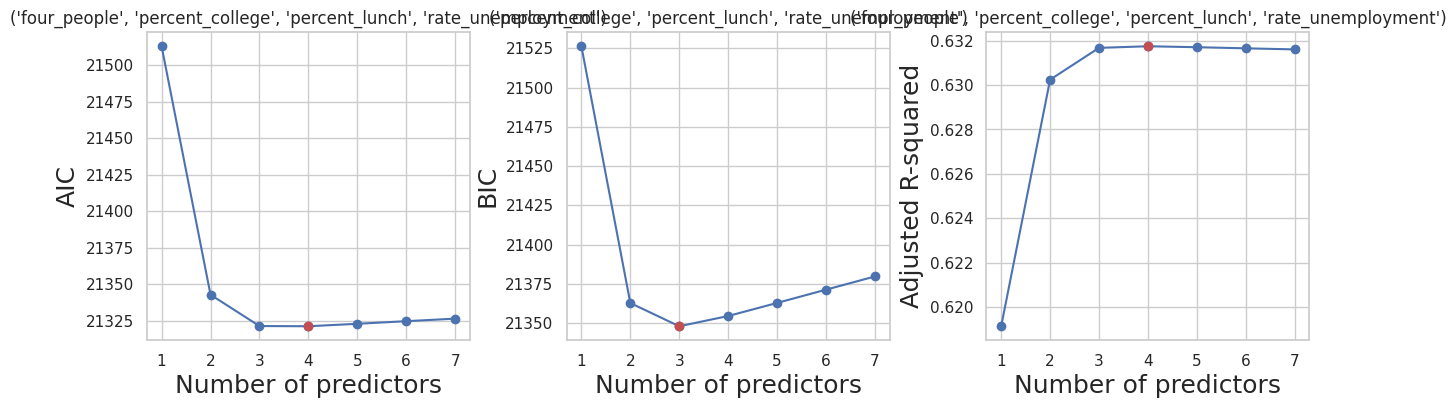

In [37]:
plot_best_subset_results(best_aic, best_bic, best_adjusted_rsquared, best_predictors)

With this code we can tell that there are four best predictors and it includes: 
1. Four_people 
2. Percent_college 
3. Percent_lunch 
4. Rate_unemployment

### Model fit with Regression Line - Four_people and Average ACT Score

Make a scatter plot with a regression line for `four_people` and `average_act`

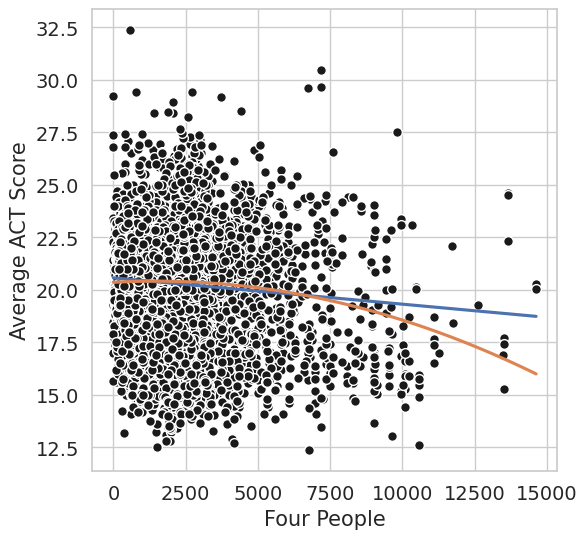

In [38]:
plt.figure(figsize=(6,6))

# Scatter plot 
plt.plot(df_train['four_people'], df_train['average_act'], 'ko', mec ='w', ms=7)

# Add the regression line
sns.regplot(data=df_train, x = 'four_people', y = 'average_act', order=1, scatter=False, ci=None)
sns.regplot(data=df_train, x = 'four_people', y = 'average_act', order=2, scatter=False, ci=None)

# Add axis labels
plt.xlabel('Four People', fontsize=15)
plt.ylabel('Average ACT Score', fontsize=15)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14);

In [39]:
four_people_model = smf.ols(formula='average_act ~ four_people', data = df_train).fit()

print(four_people_model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     52.29
Date:                Thu, 18 May 2023   Prob (F-statistic):           5.40e-13
Time:                        00:00:19   Log-Likelihood:                -13519.
No. Observations:                5781   AIC:                         2.704e+04
Df Residuals:                    5779   BIC:                         2.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      20.5720      0.049    424.039      

The Ordinary Least Squares (OLS) indicates that there is only a .9% of variability in 'average_act' can be explained by the independent variable four people

 The four_people variable is statistically significant and negatively associated with average_act, but the model overall has limited explanatory power and effect on the dependent variable average_act

Now we are going to do the same thing but with percent of students on Assisted Lunch

### Model fit with Regression Line - Percent of Students of Assisted Lunch and Average ACT Score

Make a scatter plot with a regression line for `percent_lunch` and `average_act`

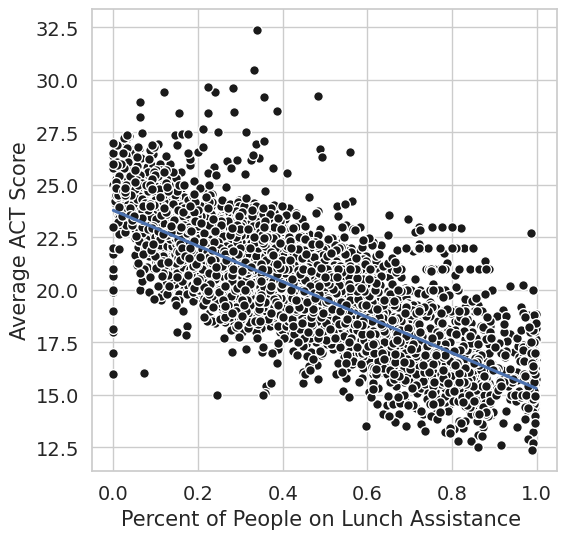

In [18]:
plt.figure(figsize=(6,6))

# Scatter plot 
plt.plot(df_train['percent_lunch'], df_train['average_act'], 'ko', mec ='w', ms=7)

# Add the regression line
sns.regplot(data=df_train, x = 'percent_lunch', y = 'average_act', order=1, scatter=False, ci=None)

# Add axis labels
plt.xlabel('Percent of People on Lunch Assistance ', fontsize=15)
plt.ylabel('Average ACT Score', fontsize=15)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14);

`percent_lunch` model

In [40]:
percent_lunch_model = smf.ols(formula='average_act ~ percent_lunch', data = df_train).fit()

print(percent_lunch_model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     9397.
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        00:18:12   Log-Likelihood:                -10755.
No. Observations:                5781   AIC:                         2.151e+04
Df Residuals:                    5779   BIC:                         2.153e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.7848      0.041    576.911

In this OLS regression model we can see the R-squared and adjusted R-squared values are both 0.619, indicating that approximately 61.9% of the variability in average_act can be explained by percent_lunch.

In summary, this regression model shows a moderate-to-strong relationship between percent_lunch and average_act. The model has a relatively high R-squared value, indicating that percent_lunch explains a substantial portion of the variance in average_act

## Heat Map Visualizations with ACT scores & Percent Lunch

Earlier, we emphasized the significance of percent lunch as a crucial predictor of average ACT scores. Now, we will delve into visualizing this relationship by plotting heat maps.

ACT Scores by State

In [21]:
layout = dict(
    geo={'scope': 'usa'},
    title='ACT Scores by State'
)

#Define Data
data = dict(
    type='choropleth',
    locations=df_train['state'],
    locationmode='USA-states',
    z=df_train['average_act'],
    text=df_train['state'],
    colorscale='Viridis',
    colorbar={'title': 'Average ACT Scores'}
)

#Create figure object
fig = go.Figure(data = [data], layout = layout)

#show the figure
pyo.iplot(fig)

Percent of Students on Assisted Lunch by State

In [23]:
layout = dict(
    geo={'scope': 'usa'},
    title='Percent of Students on Assisted Lunch by State'
)

#Define Data
data = dict(
    type='choropleth',
    locations=df_train['state'],
    locationmode='USA-states',
    z=df_train['percent_lunch'],
    text=df_train['state'],
    colorscale='Viridis',
    colorbar={'title': 'Percent of Students on Assisted Lunch'}
)

#Create figure object
fig3 = go.Figure(data = [data], layout = layout)

#show the figure
pyo.iplot(fig3)

## Prediction

Now we are setting up a model to predict ACT scores

In [52]:

y_prediction = model.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



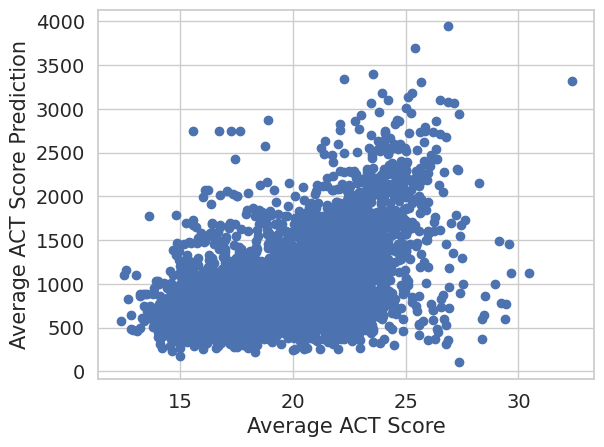

In [53]:
plt.plot(df_train['average_act'], y_prediction, 'o')

# Add axis labels
plt.xlabel('Average ACT Score', fontsize=15)
plt.ylabel('Average ACT Score Prediction', fontsize=15)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14);

# Conclusion

This section we will summarize the findings.  

**Discoveries**

During our analysis, we made some intriguing discoveries regarding the predictors of ACT scores. Surprisingly, we found that the most influential individual predictor was the percentage of students receiving lunch assistance. Initially, we expected median income to have the greatest impact. However, after conducting various models and analyses, it became evident that the percentage of students receiving lunch assistance was the primary predictor of ACT scores. This is likely because it directly affects the students themselves. Unlike median income, which considers the entire neighborhood, percent lunch specifically relates to the students' circumstances.


**Finding about household size**

Furthermore, we explored whether household size influenced average ACT scores. Typically, larger families can lead to increased responsibilities at home, potentially impacting students' ability to focus on their studies. We examined the impact of household size on ACT scores and discovered that among all household sizes, four-person households had the most notable effect. Although it did not have as significant an impact as percent lunch, it was an intriguing factor to investigate.


**Conclusion**

Overall, our analysis shed light on the importance of considering factors like percent lunch and household size when examining ACT scores, highlighting their potential influence on students' academic performance.